In [2]:
! pip install pytesseract

In [3]:
! pip install contours

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for contours: filename=contours-0.0.2-py3-none-any.whl size=8544 sha256=da87f9deeff9435af375aa32f7e98fdafbad700678d449e94c9b4abb2b5dfb4b
  Stored in directory: c:\users\yehm0\appdata\local\pip\cache\wheels\d8\d2\6b\0a6a121684fd51a6e237db9f5bbe225af086375734baa3c01c
Successfully built contours


In [4]:
import numpy as np
import cv2
import pytesseract
import matplotlib.pyplot as plt

In [5]:
print(cv2.__version__)

4.10.0


In [6]:
# your path may be different
#pytesseract.pytesseract.tesseract_cmd = 'C:/Program files (x86)/Tesseract-OCR/tesseract.exe'  

In [7]:
pytesseract.pytesseract.tesseract_cmd = 'C:/Program files/Tesseract-OCR/tesseract.exe'  

In [8]:
img = cv2.imread('C:\MMM8888.jpg')

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\yehm0\AppData\Local\Temp\ipykernel_14440\4277164267.py:1: SyntaxWarning: invalid escape sequence '\M'
  img = cv2.imread('C:\MMM8888.jpg')


In [9]:
#convert my image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [10]:
#perform adaptive threshold so that I can extract proper contours from the image
#need this to extract the name plate from the image. 
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
contours,h = cv2.findContours(thresh,1,2)

In [11]:
#once I have the contours list, i need to find the contours which form rectangles.
#the contours can be approximated to minimum polygons, polygons of size 4 are probably rectangles

largest_rectangle = [0,0]
for cnt in contours:
    approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
    if len(approx)==4:    #polygons with 4 points is what I need.
        area = cv2.contourArea(cnt)
        if area > largest_rectangle[0]:        
            
            #find the polygon which has the largest size.
            largest_rectangle = [cv2.contourArea(cnt), cnt, approx] 

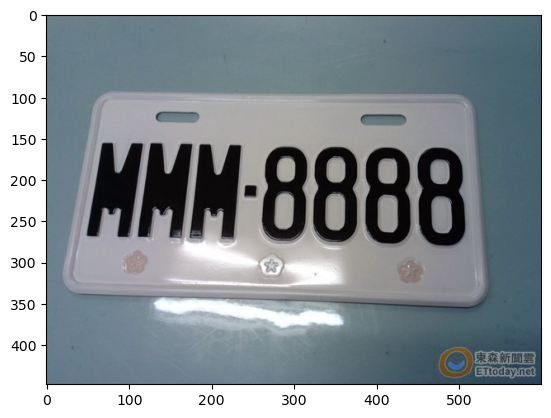

In [12]:
x,y,w,h = cv2.boundingRect(largest_rectangle[1])

#crop the rectangle to get the number plate.
roi=img[y:y+h,x:x+w]

#cv2.drawContours(img,[largest_rectangle[1]],0,(0,0,255),-1)
plt.imshow(roi, cmap = 'gray')
plt.show()

In [13]:
gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11, 5)
text = pytesseract.image_to_string(roi)
print(text)

TesseractNotFoundError: C:/Program files/Tesseract-OCR/tesseract.exe is not installed or it's not in your PATH. See README file for more information.

In [ ]:
# https://stackoverflow.com/questions/54419097/how-to-extract-and-recognize-the-vehicle-plate-number-with-python